# Business Understanding

Het jaarlijkse energieverbruik door Nederlanders blijft maar toenemen, ondanks alle bezuinigende maatregelen die we treffen als volk. Het toenemende energiegebruik is mede verantwoordelijk voor de wereldwijde klimaatveranderingen. De gemiddelde temperatuur over de afgelopen eeuw is gestegen, de hoeveelheid en intensiteit van neerslag zijn toegenomen en zeer warme dagen komen steeds vaker voor. Het realiseren van de klimaatdoelen van Parijs is nodig om verdere opwarming van de aarde en de gevolgen daarvan zo veel mogelijk te voorkomen. Om aan de afspraken van Parijs te voldoen moet Nederland overstappen van fossiele brandstoffen op duurzame energiebronnen zoals zon en wind. Het is daarom belangrijker dan ooit om na te denken over nieuwe manieren van energie opwekken en het indammen van energieverspilling. 

Enexis, Liander en Stedin zijn de drie grote netwerkbeheerders van Nederland en leveren samen energie aan bijna het hele land. Elk jaar publiceren deze bedrijven een tabel met het energieverbruik van de gebieden die onder hun beheer vallen, op hun websites. 
Welke inzichten kunnen uit deze Nederlandse verbruiksdata gegenereerd worden? En hoe kunnen we deze inzichten toepassen om een bijdrage te kunnen leveren aan de innovatie op het gebied van energieopwekking en het tegengaan van energieverspilling? 

Het doel van deze challenge is om inzichten te creëren die wellicht kunnen bijdragen aan de innovatie op het gebied van energieopwekking en het tegengaan van energieverspilling. Om niet verdwaald te raken in alle mogelijkheden die deze datasets bieden, zijn er van te voren een aantal hoofdvragen opgesteld. Deze hoofdvragen kunnen later nog worden opgesplitst in deelvragen.
Als we kijken naar de data die beschikbaar is, kunnen we een aantal vragen bedenken die wellicht met behulp van data science kunnen worden opgelost. Deze vragen zijn als volgt:
- Welke regio’s zijn de grootgebruikers van het land en waar ligt dit aan?
- Kunnen we het gas- en/of energieverbruik van het/de aankomende jaar/jaren voorspellen en zo ja, wat vertelt deze voorspelling ons?
- Kunnen we achterhalen wat voor type gebruiker (bijv. een winkel of huis) de meeste energie verspilt en zo ja, hier een oplossing voor bedenken?


# Data Understanding

De data bestaat zowel uit gasverbruik als energieverbruik. In de data worden een aantal kolommen gebruikt die hieronder toegelicht worden:

| **Kolomnaam** | **Toelichting** | **Voorbeeld** |
| --- | --- | --- |
| net\_manager | Welk bedrijf het netwerk onderhoud. | Enexis B.V. |
| purchase\_area | Bij welk bedrijf de elektriciteit en gas gekocht wordt. | ENEXIS |
| street | Over welke straat de data gaat. | Sasdijk |
| zipcode\_from | Deze vormt samen met zipcode\_to een range over welke postcodes de data gaat. | 4251AB |
| zipcode\_to | Deze vormt samen met zipcode\_from een range over welke postcodes de data gaat. Deze is gelijk aan zipcode\_from als het postcodegebied meer dan 9 aansluitingen heeft. | 4251AB |
| city | Uit welke stad de data komt. | WERKENDAM |
| num\_connections | De hoeveelheid aansluitingen die binnen de range zijn van de postcodes. | 16 |
| delivery\_perc | Welk percentage van het stroomverbruik geleverd is door de energieleverancier. Wanneer een locatie bijvoorbeeld zonnepanelen heeft is dit percentage lager. | 100 |
| perc\_of\_active\_connections | Welk percentage van de aansluitingen actief zijn. | 100 |
| type\_conn\_perc | Welk percentage van de aansluitingen bestaat uit het type van type\_if\_connection. | 50 |
| type\_of\_connection | Welk soort aansluiting er aanwezig is. Voor elektriciteit is dit #zekeringen X #ampère. Voor gas is G4, G6, G10, G16 en G25. Deze aansluitingen hebben verschillende doorlaat waardes, G6 10m3 per uur door. | Gas: G6Elektriciteit: 1X25 |
| annual\_consume | Jaarlijks gebruik in kWh voor elektriciteit of voor gas in m3 | elektriciteit:4961gas:3215 |
| annual\_consume\_lowtarif\_perc | Welk percentage van het verbruikt tijdens laag tarief is(tussen 22:00 en 07:00 en in het weekend) | 25 |
| smartmeter\_perc | percentage gebruik smartmeter (alle generaties) | 0 |

In [1]:
import pandas as pd
import glob
gasPath = 'datasets\Gas'
elecPath = 'datasets\Electricity'

## Stedin Gas

In [2]:
stedin_gas = glob.glob(gasPath + "/stedin_*.csv")
li = []  #waarom variabele li? (naarmate ik hier langer mee bezig was bedacht ik me dat het mogelijk voor list staat?)

for filename in stedin_gas:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

stedinFrame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(stedinFrame.info())
print(stedinFrame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934948 entries, 0 to 934947
Data columns (total 15 columns):
net_manager                     934948 non-null int64
purchase_area                   934947 non-null object
street                          934948 non-null object
zipcode_from                    934948 non-null object
zipcode_to                      934948 non-null object
city                            934948 non-null object
num_connections                 934948 non-null int64
delivery_perc                   934948 non-null float64
perc_of_active_connections      934948 non-null float64
type_conn_perc                  934948 non-null float64
type_of_connection              934948 non-null object
annual_consume                  934948 non-null int64
annual_consume_lowtarif_perc    934948 non-null float64
smartmeter_perc                 934948 non-null float64
year                            934948 non-null object
dtypes: float64(5), int64(3), object(7)
memory usage: 107.0+ M

## Stedin Elektriciteit

In [3]:
stedin_elec = glob.glob(elecPath + "/stedin_*.csv")
li = []

for filename in stedin_elec:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

stedin_Elec_Frame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(stedin_Elec_Frame.info())
print(stedin_Elec_Frame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913096 entries, 0 to 913095
Data columns (total 15 columns):
net_manager                     913096 non-null int64
purchase_area                   913096 non-null object
street                          913096 non-null object
zipcode_from                    913096 non-null object
zipcode_to                      913096 non-null object
city                            913096 non-null object
num_connections                 913096 non-null int64
delivery_perc                   913096 non-null float64
perc_of_active_connections      913096 non-null float64
type_conn_perc                  913096 non-null float64
type_of_connection              913096 non-null object
annual_consume                  913096 non-null int64
annual_consume_lowtarif_perc    913096 non-null float64
smartmeter_perc                 913096 non-null float64
year                            913096 non-null object
dtypes: float64(5), int64(3), object(7)
memory usage: 104.5+ M

## Liander Gas

In [4]:
liander_gas = glob.glob(gasPath + "/liander_*.csv") 

li = []

for filename in liander_gas:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

lianderFrame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(lianderFrame.info())
print(lianderFrame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200607 entries, 0 to 1200606
Data columns (total 15 columns):
net_manager                     1200607 non-null object
purchase_area                   964673 non-null object
street                          1200607 non-null object
zipcode_from                    1200607 non-null object
zipcode_to                      1200607 non-null object
city                            1200607 non-null object
num_connections                 1200607 non-null float64
delivery_perc                   1200607 non-null float64
perc_of_active_connections      1200607 non-null float64
type_conn_perc                  1200607 non-null float64
type_of_connection              1200607 non-null object
annual_consume                  1200607 non-null float64
annual_consume_lowtarif_perc    1200607 non-null float64
smartmeter_perc                 1200607 non-null float64
year                            1200607 non-null object
dtypes: float64(7), object(8)
memory usag

## Liander Elektriciteit

In [5]:
liander_elec = glob.glob(elecPath + "/liander_*.csv")
li = []

for filename in liander_elec:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

liander_Elec_Frame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(liander_Elec_Frame.info())
print(liander_Elec_Frame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511295 entries, 0 to 1511294
Data columns (total 15 columns):
net_manager                     1511295 non-null object
purchase_area                   624638 non-null object
street                          1511295 non-null object
zipcode_from                    1511295 non-null object
zipcode_to                      1511295 non-null object
city                            1511295 non-null object
num_connections                 1511295 non-null float64
delivery_perc                   1511295 non-null float64
perc_of_active_connections      1511295 non-null float64
type_conn_perc                  1511295 non-null float64
type_of_connection              1511295 non-null object
annual_consume                  1511295 non-null float64
annual_consume_lowtarif_perc    1511295 non-null float64
smartmeter_perc                 1511295 non-null float64
year                            1511295 non-null object
dtypes: float64(7), object(8)
memory usag

## Enexis Gas

In [6]:
enexis_gas = glob.glob(gasPath + "/enexis_*.csv")
li = []

for filename in enexis_gas:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

enexisFrame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(enexisFrame.info())
print(enexisFrame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950202 entries, 0 to 950201
Data columns (total 15 columns):
net_manager                     950202 non-null object
purchase_area                   950202 non-null object
street                          950202 non-null object
zipcode_from                    950202 non-null object
zipcode_to                      950202 non-null object
city                            950202 non-null object
delivery_perc                   950202 non-null float64
num_connections                 950202 non-null int64
perc_of_active_connections      950202 non-null int64
type_conn_perc                  867236 non-null float64
type_of_connection              867236 non-null object
annual_consume                  950202 non-null float64
annual_consume_lowtarif_perc    950202 non-null float64
smartmeter_perc                 0 non-null float64
year                            950202 non-null object
dtypes: float64(5), int64(2), object(8)
memory usage: 108.7+ MB
No

## Enexis Elektriciteit

In [7]:
enexis_elec = glob.glob(elecPath + "/enexis_*.csv")
li = []

for filename in enexis_elec:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = filename[-8:].strip('.csv')
    li.append(df)

enexis_Elec_Frame = pd.concat(li, axis=0, ignore_index=True, sort=False)
print(enexis_Elec_Frame.info())
print(enexis_Elec_Frame.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141402 entries, 0 to 1141401
Data columns (total 15 columns):
net_manager                     1141402 non-null object
purchase_area                   1141402 non-null object
street                          1141402 non-null object
zipcode_from                    1141402 non-null object
zipcode_to                      1141402 non-null object
city                            1141402 non-null object
delivery_perc                   1140820 non-null float64
num_connections                 1141402 non-null int64
perc_of_active_connections      1141402 non-null int64
type_conn_perc                  1033890 non-null float64
type_of_connection              1033821 non-null object
annual_consume                  1141402 non-null float64
annual_consume_lowtarif_perc    1141402 non-null float64
smartmeter_perc                 1141402 non-null float64
year                            1141402 non-null object
dtypes: float64(5), int64(2), object(8)
memo

In [8]:
gasFrame = pd.concat([stedinFrame, lianderFrame, enexisFrame], sort=True)
print(gasFrame.info())
print(gasFrame.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3085757 entries, 0 to 950201
Data columns (total 15 columns):
annual_consume                  float64
annual_consume_lowtarif_perc    float64
city                            object
delivery_perc                   float64
net_manager                     object
num_connections                 float64
perc_of_active_connections      float64
purchase_area                   object
smartmeter_perc                 float64
street                          object
type_conn_perc                  float64
type_of_connection              object
year                            object
zipcode_from                    object
zipcode_to                      object
dtypes: float64(7), object(8)
memory usage: 376.7+ MB
None
   annual_consume  annual_consume_lowtarif_perc          city  delivery_perc  \
0          2611.0                           0.0     AMSTERDAM          100.0   
1          2993.0                           0.0     AMSTERDAM          100.0 

In [9]:
uniqueCities = gasFrame.set_index('city').index.unique().sort_values()
print(len(uniqueCities))
print(uniqueCities)

# We see that not all cities are written the same way. i.e. 'S-GRAVENHAGE, 'S GRAVENHAGE, S- GRAVENHAGE, S-GRAVENHAGE etc.

2219
Index([''S GRAVENDEEL', ''S GRAVENHAGE', ''S GRAVENMOER', ''S-GRAVELAND',
       ''S-GRAVENDEEL', ''S-GRAVENHAGE', ''S-HEERENBERG', ''S-HEERENBROEK',
       ''S-HERTOGENBOSCH', ''T GOY',
       ...
       'ZWANENBURG', 'ZWARTEBROEK', 'ZWARTEMEER', 'ZWARTEWAAL', 'ZWEELOO',
       'ZWEINS', 'ZWIGGELTE', 'ZWIJNDRECHT', 'ZWOLLE', '\'T LOO OLDEBROEK'],
      dtype='object', name='city', length=2219)


# Data Preparation

### Gas

In [10]:
# df.loc[~df['city'].str.contains('S-', na=False), 'city'] = df.loc[~df['city'].str.contains('S-', na=False), 'city'].str.replace('S-', 'bla')

gasFrame.loc[gasFrame['city'].str.startswith('\'S-'), 'city'] = gasFrame.loc[gasFrame['city'].str.startswith('\'S-'), 'city'].str.replace('\'S-', 'S-')
gasFrame.loc[gasFrame['city'].str.startswith('S-'), 'city'] = gasFrame.loc[gasFrame['city'].str.startswith('S-'), 'city'].str.replace('S-', 'S-')
gasFrame.loc[gasFrame['city'].str.startswith('\'S- '), 'city'] = gasFrame.loc[gasFrame['city'].str.startswith('\'S- '), 'city'].str.replace('\'S- ', 'S-')
gasFrame.loc[gasFrame['city'].str.startswith('S '), 'city'] = gasFrame.loc[gasFrame['city'].str.startswith('S '), 'city'].str.replace('S ', 'S-')
gasFrame.loc[gasFrame['city'].str.startswith('\'S '), 'city'] = gasFrame.loc[gasFrame['city'].str.startswith('\'S '), 'city'].str.replace('\'S ', 'S-')

print(gasFrame.loc[gasFrame['city'].str.contains('\'S GRAVENHAGE')])

Empty DataFrame
Columns: [annual_consume, annual_consume_lowtarif_perc, city, delivery_perc, net_manager, num_connections, perc_of_active_connections, purchase_area, smartmeter_perc, street, type_conn_perc, type_of_connection, year, zipcode_from, zipcode_to]
Index: []


In [11]:
cleanedUniqueCities = gasFrame.set_index('city').index.unique().sort_values()
print(len(cleanedUniqueCities))
print(cleanedUniqueCities)

2216
Index([''T GOY', ''T HAANTJE', ''T HARDE', ''T LOO OLDEBROEK', ''T VELD',
       ''T WAAR', ''T ZAND NH', ''T ZANDT GN', '1E EXLOERMOND',
       '2E EXLOERMOND',
       ...
       'ZWANENBURG', 'ZWARTEBROEK', 'ZWARTEMEER', 'ZWARTEWAAL', 'ZWEELOO',
       'ZWEINS', 'ZWIGGELTE', 'ZWIJNDRECHT', 'ZWOLLE', '\'T LOO OLDEBROEK'],
      dtype='object', name='city', length=2216)


### Elektriciteit

In [12]:
elecFrame = pd.concat([stedin_Elec_Frame.drop(0), liander_Elec_Frame.drop(0), enexis_Elec_Frame.drop(0)], sort=False) 
# zonder drop blijven de indexes van de originele dataframes er in staan, dit resulteert er in dat er 3 dataframes met index 0 voorkomen

print(elecFrame.info())
elecFrame.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565790 entries, 1 to 1141401
Data columns (total 15 columns):
net_manager                     object
purchase_area                   object
street                          object
zipcode_from                    object
zipcode_to                      object
city                            object
num_connections                 float64
delivery_perc                   float64
perc_of_active_connections      float64
type_conn_perc                  float64
type_of_connection              object
annual_consume                  float64
annual_consume_lowtarif_perc    float64
smartmeter_perc                 float64
year                            object
dtypes: float64(7), object(8)
memory usage: 435.3+ MB
None


,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
1,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AC,1231AC,LOOSDRECHT,17.0,100.0,100.0,41.0,1x25,3467.0,76.47,0.00,2009
2,8716874000009,Stedin Utrecht,Rembrandtlaan,1231AD,1231AD,LOOSDRECHT,17.0,100.0,100.0,41.0,3x25,3880.0,64.71,0.00,2009
3,8716874000009,Stedin Utrecht,Jan Steenlaan,1231AE,1231AE,LOOSDRECHT,20.0,100.0,100.0,45.0,1x25,4699.0,85.00,0.00,2009
4,8716874000009,Stedin Utrecht,Pieter de Hooghlaan,1231AG,1231AG,LOOSDRECHT,17.0,100.0,100.0,71.0,1x25,4039.0,64.71,0.00,2009
5,8716874000009,Stedin Utrecht,Paulus Potterlaan,1231AH,1231AH,LOOSDRECHT,22.0,100.0,100.0,41.0,3x25,3991.0,86.36,4.55,2009


# Modeling

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

2216


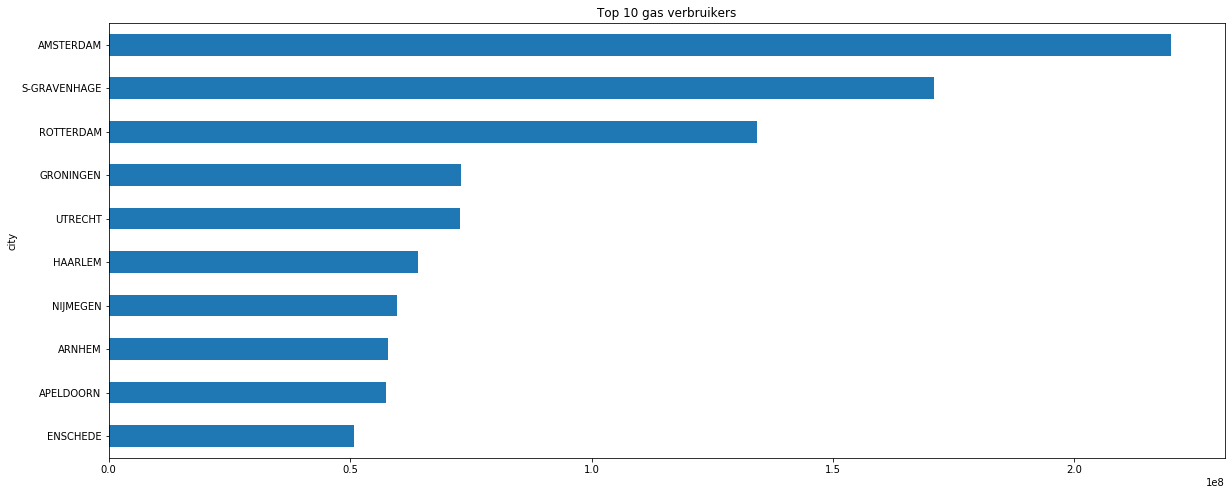

In [14]:
totalConsumePerCity = gasFrame.groupby(['city'])['annual_consume'].sum().sort_values(ascending=False)
print(totalConsumePerCity.count())

fig, ax = plt.subplots(1,1, figsize=(20, 8))
totalConsumePerCity.head(10).sort_values().plot(kind='barh', title='Top 10 gas verbruikers')
plt.show()



In [15]:
sortedCities = gasFrame.groupby(['city', 'year'])[['annual_consume','year']].sum().sort_values(['annual_consume', 'year'], ascending=[False, False])
top3 = sortedCities.loc[['AMSTERDAM', 'S-GRAVENHAGE', 'ROTTERDAM']]

# print(top3)
top3 = top3.reset_index()

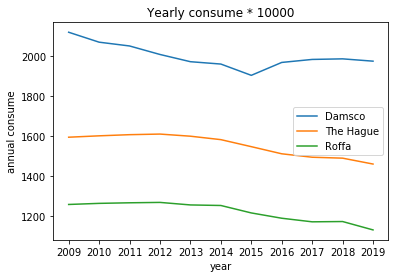

In [16]:
top3 = top3.sort_values(['city', 'year'])

x1 = top3[top3['city'] == 'AMSTERDAM']['year']
y1 = top3[top3['city'] == 'AMSTERDAM']['annual_consume']/10000
plt.plot(x1, y1, label = "Damsco")

x2 = top3[top3['city'] == 'S-GRAVENHAGE']['year']
y2 = top3[top3['city'] == 'S-GRAVENHAGE']['annual_consume']/10000
plt.plot(x2, y2, label = "The Hague")

x3 = top3[top3['city'] == 'ROTTERDAM']['year']
y3 = top3[top3['city'] == 'ROTTERDAM']['annual_consume']/10000
plt.plot(x3, y3, label = "Roffa")

plt.title('Yearly consume * 10000')
plt.xlabel('year')
plt.ylabel('annual consume')

plt.legend()
plt.show()

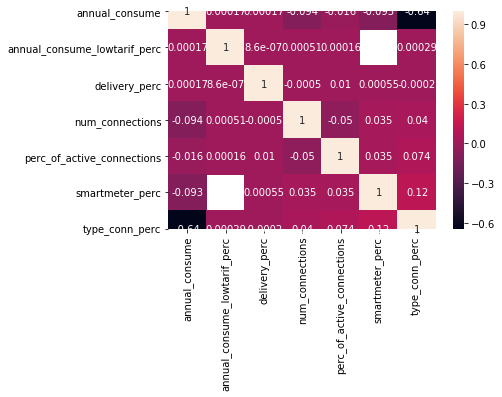

In [17]:
corr = gasFrame.corr()

sns.heatmap(corr, annot=True)

         annual use  # households  average use
2009   97783.836200        214167  4565.775129
2010  151664.251100        323139  4693.467861
2011  152521.313000        325219  4689.803271
2012  154323.431200        327989  4705.140453
2013  154687.333100        331975  4659.607895
2014  153084.688300        332385  4605.643705
2015  148446.935000        333615  4449.648097
2016  146126.587400        335007  4361.896539
2017  145989.905900        341250  4278.092481
2018  150845.282884        351123  4296.080943
2019  146564.089577        349921  4188.490819


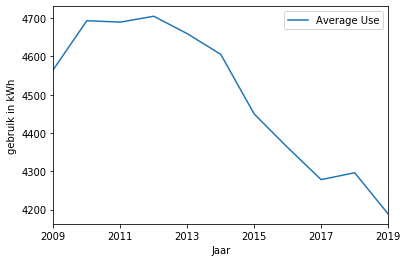

In [18]:
#fig, ax = plt.subplots(figsize=(15,7))
#annual_Consume_Elec = elecFrame.groupby('year').count()['annual_consume'].plot(ax=ax)
#plt.show()


#elecFrame["annual_consume"].sum(axis=0).where(elecFrame["year"] == "2010", 0)
#df['total'] = elecFrame.loc[elecFrame['year'] == 2010,['annual_consume']].sum(axis=0)

years = ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]

cons_year = []
households_year = []
avg_cons = []
for i in years:
    sum_ann = elecFrame["annual_consume"].where(elecFrame['year'] == i).sum()
    sum_ann_div = sum_ann/10000
    households = elecFrame["year"].where(elecFrame["year"] == i).count()
    avg = sum_ann/households
    cons_year.append(sum_ann_div)
    households_year.append(households)
    avg_cons.append(avg)


data = zip(cons_year, households_year, avg_cons)
annual_use = pd.DataFrame(list(data), index = years, columns = ["annual use", "# households", "average use"])
#annual_use_electricity = pd.DataFrame(cons_year, index = years, columns = ["annual use"])
print(annual_use)
#annual_use.plot()
avg_use = pd.DataFrame(avg_cons, index = years, columns = ["Average Use"])
avg_use_plot = avg_use.plot()
avg_use_plot.set_ylabel("gebruik in kWh")
avg_use_plot.set_xlabel("Jaar")
plt.show()

In [24]:
enexis_Elec_Frame.sort_values(by='annual_consume', ascending=False).head(10)


,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,delivery_perc,num_connections,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
360728,Enexis B.V.,ENEXIS,Markt,5554CC,5554CC,VALKENSWAARD,100.00,11,100,45.00,3X80,73043.0,55.0,0.0,2013
114786,Enexis B.V.,ENEXIS,Kruisvoort,4814RX,4814RZ,BREDA,100.00,30,100,40.00,3X63,70309.0,50.0,0.0,2011
223185,Enexis B.V.,ENEXIS,Kruisvoort,4814RX,4814RZ,BREDA,100.00,29,100,41.00,3X63,68823.0,54.0,10.0,2012
250690,Enexis B.V.,ENEXIS,Markt,5554CC,5554CC,VALKENSWAARD,100.00,12,100,42.00,3X25,67920.0,54.0,0.0,2012
674011,Enexis B.V.,ENEXIS,Kruisvoort,4814RX,4814RZ,BREDA,100.00,30,100,43.00,3x80,67074.0,33.0,40.0,2016
1059290,Enexis B.V.,ENEXIS,Esp,5633AD,5633AE,EINDHOVEN,81.82,11,100,54.55,3x63,66823.0,43.4,100.0,2019
141961,Enexis B.V.,ENEXIS,Markt,5554CC,5554CC,VALKENSWAARD,100.00,12,100,42.00,3X25,66725.0,58.0,0.0,2011
7229,Enexis B.V.,ENEXIS,Kruisvoort,4814RX,4814RZ,BREDA,100.00,27,100,NaN,NaN,66446.0,44.0,0.0,2010
333052,Enexis B.V.,ENEXIS,Kruisvoort,4814RX,4814RZ,BREDA,100.00,30,100,37.00,3X63,66371.0,48.0,17.0,2013
446342,Enexis B.V.,ENEXIS,Kruisvoort,4814RX,4814RZ,BREDA,100.00,29,100,38.00,3X80,66271.0,21.0,24.0,2014


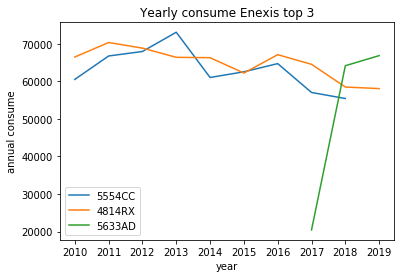

In [48]:
xee1 = enexis_Elec_Frame[enexis_Elec_Frame['zipcode_from'] == '5554CC']['year']
yee1 = enexis_Elec_Frame[enexis_Elec_Frame['zipcode_from'] == '5554CC']['annual_consume']
plt.plot(xee1, yee1, label = "5554CC")

xee2 = enexis_Elec_Frame[enexis_Elec_Frame['zipcode_from'] == '4814RX']['year']
yee2 = enexis_Elec_Frame[enexis_Elec_Frame['zipcode_from'] == '4814RX']['annual_consume']
plt.plot(xee2, yee2, label = "4814RX")

xee3 = enexis_Elec_Frame[enexis_Elec_Frame['zipcode_from'] == '5633AD']['year']
yee3 = enexis_Elec_Frame[enexis_Elec_Frame['zipcode_from'] == '5633AD']['annual_consume']
plt.plot(xee3, yee3, label = "5633AD")

plt.title('Yearly consume Enexis top 3')
plt.xlabel('year')
plt.ylabel('annual consume')

plt.legend()
plt.show()

In [55]:
lianderFrame.sort_values(by='annual_consume', ascending=False).head(10)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
60077,GAS Liander,GAS Gastransport Services (GASUNIE),Galvanistraat,3861NJ,3861NJ,NIJKERK GLD,13.0,100.0,100.00,23.0,G10,37291.0,0.0,0.00,2009
415164,GAS Liander,GAS Gastransport Services (GASUNIE),Papaverweg,1032KJ,1032KJ,AMSTERDAM,16.0,100.0,87.50,25.0,G16,33533.0,0.0,6.25,2013
520507,GAS Liander,GAS Gastransport Services (GASUNIE),Papaverweg,1032KJ,1032KJ,AMSTERDAM,17.0,100.0,88.24,24.0,G16,31553.0,0.0,11.76,2014
626189,GAS Liander,GAS Gastransport Services (GASUNIE),Papaverweg,1032KJ,1032KJ,AMSTERDAM,17.0,100.0,82.35,24.0,G25,31115.0,0.0,11.76,2015
732211,GAS Liander,GAS Gastransport Services (GASUNIE),Papaverweg,1032KJ,1032KJ,AMSTERDAM,17.0,100.0,82.35,24.0,G16,29824.0,0.0,11.76,2016
849473,GAS Liander,NaN,Papaverweg,1032KJ,1032KJ,AMSTERDAM,17.0,100.0,82.35,24.0,G25,29654.0,0.0,17.65,2017
967212,GAS Liander,NaN,Papaverweg,1032KJ,1032KJ,AMSTERDAM,17.0,100.0,82.35,24.0,G25,29625.0,0.0,17.65,2018
1085420,Liander NB,LIANDER,Papaverweg,1032KJ,1032KJ,AMSTERDAM,17.0,100.0,82.35,100.0,G16,29297.0,0.0,17.65,2019
1055721,GAS Liander,NaN,Rondweg Zuid,7102JE,7102JH,WINTERSWIJK,11.0,100.0,81.82,55.0,G25,25627.0,0.0,9.09,2018
161171,GAS Liander,GAS Gastransport Services (GASUNIE),Galvanistraat,3861NJ,3861NJ,NIJKERK GLD,14.0,100.0,85.71,29.0,G25,25076.0,0.0,0.00,2010


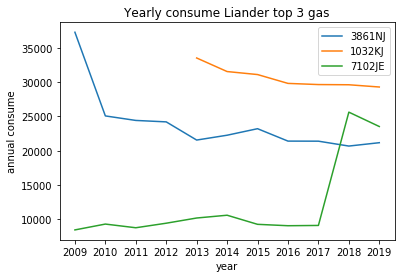

In [56]:
xlg1 = lianderFrame[lianderFrame['zipcode_from'] == '3861NJ']['year']
ylg1 = lianderFrame[lianderFrame['zipcode_from'] == '3861NJ']['annual_consume']
plt.plot(xlg1, ylg1, label = "3861NJ")

xlg2 = lianderFrame[lianderFrame['zipcode_from'] == '1032KJ']['year']
ylg2 = lianderFrame[lianderFrame['zipcode_from'] == '1032KJ']['annual_consume']
plt.plot(xlg2, ylg2, label = "1032KJ")

xlg3 = lianderFrame[lianderFrame['zipcode_from'] == '7102JE']['year']
ylg3 = lianderFrame[lianderFrame['zipcode_from'] == '7102JE']['annual_consume']
plt.plot(xlg3, ylg3, label = "7102JE")

plt.title('Yearly consume Liander top 3 gas')
plt.xlabel('year')
plt.ylabel('annual consume')

plt.legend()
plt.show()

In [57]:
stedinFrame.sort_values(by='annual_consume', ascending=False).head(10)

,net_manager,purchase_area,street,zipcode_from,zipcode_to,city,num_connections,delivery_perc,perc_of_active_connections,type_conn_perc,type_of_connection,annual_consume,annual_consume_lowtarif_perc,smartmeter_perc,year
870701,8716892000005,NG Den Haag,Strandweg,2586JL,2586JL,'S-GRAVENHAGE,10,100.0,100.00,50.0,G16,27917,0.0,10.0,2019
527614,8716892000005,NG Den Haag,Strandweg,2586JL,2586JL,'S-GRAVENHAGE,11,100.0,81.82,55.0,G16,22498,0.0,0.0,2015
699200,8716892000005,NG Den Haag,Strandweg,2586JL,2586JL,'S-GRAVENHAGE,11,100.0,72.73,64.0,G16,21988,0.0,0.0,2017
396587,8716874000009,Pseudo Gos Houten ENBU,Rosmolenlaan,3447GL,3447GM,WOERDEN,16,100.0,87.50,50.0,G16,21536,0.0,0.0,2013
613247,8716892000005,NG Den Haag,Strandweg,2586JL,2586JL,'S-GRAVENHAGE,11,100.0,81.82,64.0,G16,20394,0.0,0.0,2016
433067,8716921000006,NG Gouda,Tolnasingel,2411PV,2411PX,BODEGRAVEN,16,100.0,93.75,44.0,G16,20207,0.0,0.0,2014
481813,8716874000009,Pseudo Gos Houten ENBU,Rosmolenlaan,3447GL,3447GM,WOERDEN,16,100.0,93.75,50.0,G16,20206,0.0,0.0,2014
279264,8716886000004,Pseudo-GOS Zoetermeer,Olof Palmelaan,2729NA,2741AB,ZOETERMEER,38,100.0,100.00,79.0,G4,19853,0.0,0.0,2012
110328,8716886000004,Pseudo-GOS Zoetermeer,Olof Palmelaan,2729NA,2741AB,ZOETERMEER,38,100.0,100.00,79.0,G4,19853,0.0,0.0,2010
194632,8716886000004,Pseudo-GOS Zoetermeer,Olof Palmelaan,2729NA,2741AB,ZOETERMEER,38,100.0,100.00,79.0,G4,19853,0.0,0.0,2011


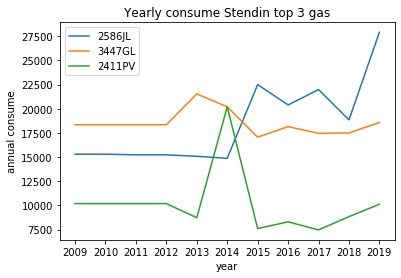

In [58]:
xsg1 = stedinFrame[stedinFrame['zipcode_from'] == '2586JL']['year']
ysg1 = stedinFrame[stedinFrame['zipcode_from'] == '2586JL']['annual_consume']
plt.plot(xsg1, ysg1, label = "2586JL")

xsg2 = stedinFrame[stedinFrame['zipcode_from'] == '3447GL']['year']
ysg2 = stedinFrame[stedinFrame['zipcode_from'] == '3447GL']['annual_consume']
plt.plot(xsg2, ysg2, label = "3447GL")

xsg3 = stedinFrame[stedinFrame['zipcode_from'] == '2411PV']['year']
ysg3 = stedinFrame[stedinFrame['zipcode_from'] == '2411PV']['annual_consume']
plt.plot(xsg3, ysg3, label = "2411PV")

plt.title('Yearly consume Stendin top 3 gas')
plt.xlabel('year')
plt.ylabel('annual consume')

plt.legend()
plt.show()

# Evaluation

# Deployment